In [1]:
import numpy as np
import matplotlib.pyplot as plt
from calculator import Calculator,Methods
from const import Const

In [2]:
cal=Calculator()
cal.read_excel('Data2.xlsx')
order=3
m=cal.M_p[order]
ST=cal.ST[order]*8.5/10
L_s=cal.L_init[order]

In [3]:
cal.me.change_const(Const(0.3))
cal.me.con.set_M_p(m)
cal.me.cal_ML_simple(ST*10/8.5,L_s)
c_P,c_T,c_M=cal.me.con.c_P,cal.me.con.c_T,cal.me.con.c_M
rcb1=cal.me.RCB_index
r=cal.me.r
P1,T1,M1,L1=cal.me.P,cal.me.T,cal.me.M,cal.me.L
dP1=c_P*M1*P1/(T1*r**2)
dT1=np.ones(len(dP1))
for i in range(len(dT1)):
    dT1[i]=min(c_T*1e24*abs(L1[i])*P1[i]**2*T1[i]**(-3)/M1[i],cal.me.con.g_ad)*(T1[i]*dP1[i]/P1[i])
cal.me.cal_ML_simple_B(ST,L_s,True,0.0,1)
rcb2=cal.me.RCB_index
P2,T2,M2,L2=cal.me.P,cal.me.T,cal.me.M,cal.me.L
G=cal.me.g
dG=cal.me.dg
dP2=c_P*M2*P2/(T2*r**2)
dT2=np.ones(len(dP2))
for i in range(len(dT2)):
    dT2[i]=min(c_T*1e24*abs(L2[i])*P2[i]**2*T2[i]**(-3)/M2[i],cal.me.con.g_ad)*(T2[i]*dP2[i]/P2[i])
ddG=6*G/r**2+((-0.5*dP2/P2)+(0.75/T2+cal.me.con.sigma_2/T2**2)*dT2)*dG-(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B

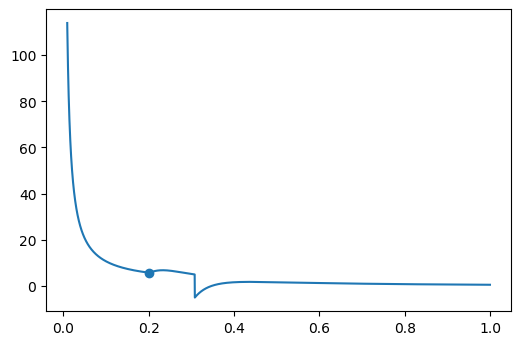

In [4]:
control=(cal.me.con.sigma_2/T2**2)*dT2
y=(-0.5*dP2/P2)+(0.75/T2+cal.me.con.sigma_2/T2**2*(abs(control)<10))*dT2
fig=plt.figure(dpi=100)
plt.plot(r,y)
plt.scatter(r[rcb2],y[rcb2],marker='o')
plt.show()

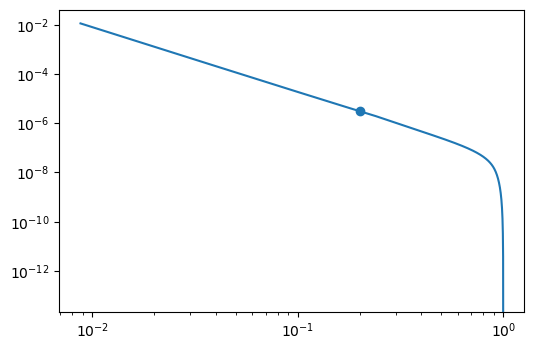

0.011459080526179426


In [5]:
fig=plt.figure(dpi=100)
plt.loglog(r,abs(G)/r/cal.me.con.R_B)
plt.scatter(r[rcb2],abs(G)[rcb2]/r[rcb2]/cal.me.con.R_B,marker='o')
plt.show()
print(abs(G[-1])/r[-1]/cal.me.con.R_B)

In [6]:
print(cal.me.L[-1])

15.284212271135704


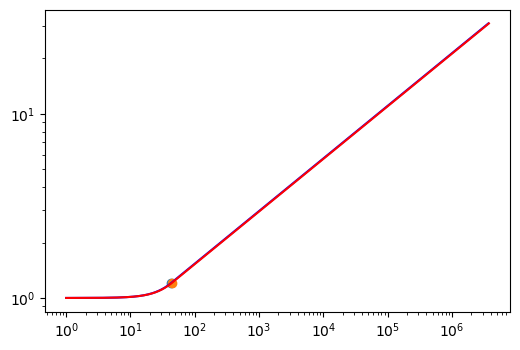

In [7]:
fig=plt.figure(dpi=100)
plt.loglog(P1,T1,'b-')
plt.scatter(P1[rcb1],T1[rcb1],marker='o')
plt.loglog(P2,T2,'r-')
plt.scatter(P2[rcb2],T2[rcb2],marker='o')
plt.show()

In [8]:
print(M1[-1])

4.999998268718483


In [9]:
print(rcb1,rcb2)

4023 4028


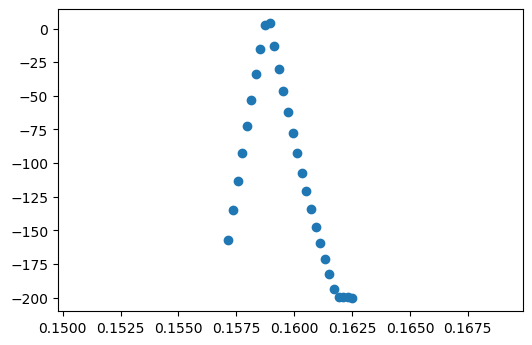

In [20]:
fig=plt.figure(dpi=100)
plt.scatter(r[4222:4250],result[4221:4249])
plt.show()

In [12]:
for i in range(len(r)):
    if 0.1<r[i]<0.2:
        print(result[i-1],i)

-212.83827345942942 4034
-212.76807654528704 4035
-212.69790236908847 4036
-212.62775088779551 4037
-212.5576220576177 4038
-212.48751583540934 4039
-212.41743217734862 4040
-212.347371039569 4041
-212.27733237866505 4042
-212.20731615033145 4043
-212.13732231097023 4044
-212.06735081609247 4045
-211.9974016219211 4046
-211.9274746838508 4047
-211.8575699578269 4048
-211.78768739915003 4049
-211.71782696326852 4050
-211.64798860578298 4051
-211.57817228157313 4052
-211.5083779461366 4053
-211.43860555420974 4054
-211.36885506107532 4055
-211.29912642130856 4056
-211.2294195896414 4057
-211.15973452111473 4058
-211.0900711697486 4059
-211.02042949047643 4060
-210.9508094371884 4061
-210.88121096455825 4062
-210.81163402628812 4063
-210.74207857678303 4064
-210.6725445698392 4065
-210.60303195899303 4066
-210.5335406984616 4067
-210.4640707413604 4068
-210.39462204166023 4069
-210.32519455227515 4070
-210.25578822693862 4071
-210.18640301837667 4072
-210.1170388797675 4073
-210.047695764

In [18]:
for i in range(4222,4250):
    print(P[i],T[i],(np.log(cal.me.sigma(P[i],T[i]))-np.log(cal.me.sigma(P[i-1],T[i-1])))/(r[1]-r[0]))

101.43709510830492 1.5323222417999214 -199.9879411838454
101.92016459536633 1.5344036515816109 -199.92112407179542
102.40605566310587 1.536490122402496 -199.854319155781
102.89478803091522 1.538581143570247 -199.7340095850055
103.38638885819432 1.5406159104401231 -193.47959771682946
103.88090789342306 1.5425488365538216 -182.68473903545657
104.3784013534152 1.5443740701812445 -171.3796791518339
104.87892822493475 1.546085692350655 -159.55824104348588
105.38255035779832 1.547677743297707 -147.21616534192734
105.88933255398842 1.54914425132166 -134.35127151535423
106.39934265202419 1.5504792638359888 -120.96360199393504
106.91265160590522 1.5516768803155674 -107.05554289597968
107.42933355796787 1.5527312867679217 -92.63191612332011
107.94946590509598 1.5536367912816873 -77.70003760597353
108.47312935781378 1.554387860132606 -62.269736517613595
109.00040799191093 1.5549791538604214 -46.35333064691084
109.53138929241076 1.5554055626784928 -29.96555431587281
110.06616418984082 1.5556622405

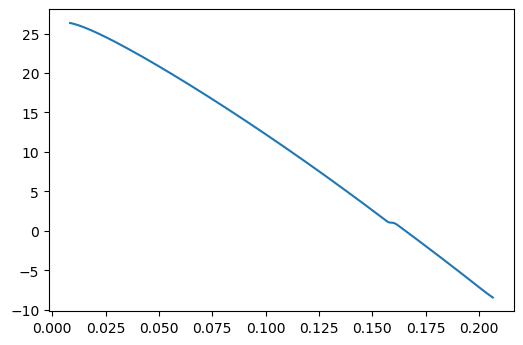

In [25]:
fig=plt.figure(dpi=100)
plt.plot(r[4000:5000],np.log(cal.me.sigma(P,T))[4000:5000])
plt.show()